## 문제 17번

## 1. 문제 정의
가중치 그래프 해밀턴 알고리즘에서 경로상의 가중치의 합이 최소가 되는 경로를 찾는 것.

각 해밀턴 사이클 전체 가중치의 합을 구해서 그 중 가장 가중치를 갖는 경로 출력

## 2. 알고리즘 정의

주어진 그래프에서 모든 해밀턴 사이클을 찾아 그 중에서 가장 낮은 가중치를 갖는 해밀턴 사이클을 찾는 알고리즘을 구현한 알고리즘.

- is_safe: 주어진 그래프에서 정점 v가 현재 경로 path에 추가될 수 있는지 여부를 확인
- hamiltonian_recur: 재귀적으로 모든 해밀턴 사이클 찾기
- hamiltonian_cycle: 주어진 그래프에서 하나의 해밀턴 사이클을 찾기
- find_all_hamiltonian_cycles: 주어진 그래프에서 모든 해밀턴 사이클을 찾기
- calculate_cycle_weight: 주어진 해밀턴 사이클의 가중치를 계산
- find_minimum_weight_cycle: 주어진 그래프에서 가장 낮은 가중치를 갖는 해밀턴 사이클을 찾기

## 3. 손으로 푼 예제

모르겠습니다....

## 4. 알고리즘 개요

입력 변수
 - g 해밀턴 사이클 찾을 그래프. 인접 행렬로 표현됨

출력 변수
 - min_cycle: 가장 낮은 가중치를 갖는 해밀턴 사이클. 정점들의 리스트로 표현
 - min_weight: 가장 낮은 가중치를 갖는 해밀턴 사이클의 가중치

## 5. 알고리즘 코드

In [ ]:
def is_safe(g, v, pos, path):
    if g[path[pos - 1]][v] == 0:
        return False
    for vertex in path:
        if vertex == v:
            return False
    return True

def hamiltonian_recur(g, path, pos):
    n = len(g)
    if pos == n:
        if g[path[pos - 1]][path[0]] == 1:
            return True
        else:
            return False

    for v in range(n):
        if is_safe(g, v, pos, path) == True:
            path[pos] = v
            if hamiltonian_recur(g, path, pos + 1) == True:
                return True
            path[pos] = -1
        
    return False

def hamiltonian_cycle(g):
    n = len(g)
    path = [-1] * n
    path[0] = 0

    if hamiltonian_recur(g, path, 1) == False:
        print("해밀토니안 사이클 없음")
        return False
    else:
        print("해밀토니안 사이클: ", path)
        return True

def find_all_hamiltonian_cycles(g):
    n = len(g)
    cycles = []

    def backtrack(path, pos):
        if pos == n:
            if g[path[pos - 1]][path[0]] == 1:
                cycles.append(path[:])
            return

        for v in range(n):
            if is_safe(g, v, pos, path):
                path[pos] = v
                backtrack(path, pos + 1)
                path[pos] = -1

    path = [-1] * n
    path[0] = 0
    backtrack(path, 1)

    return cycles

def calculate_cycle_weight(g, cycle):
    weight = 0
    for i in range(len(cycle)):
        weight += g[cycle[i - 1]][cycle[i]]
    return weight

# Example usage
g1 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
]

g2 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
]

g3 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1],
]

def find_minimum_weight_cycle(graph):
    all_cycles = find_all_hamiltonian_cycles(graph)
    min_weight = float('inf')
    min_cycle = None

    for cycle in all_cycles:
        weight = calculate_cycle_weight(graph, cycle)
        if weight < min_weight:
            min_weight = weight
            min_cycle = cycle

    return min_cycle

## 6. 테스트 코드

In [ ]:
def is_safe(g, v, pos, path):
    if g[path[pos - 1]][v] == 0:
        return False
    for vertex in path:
        if vertex == v:
            return False
    return True

def hamiltonian_recur(g, path, pos):
    n = len(g)
    if pos == n:
        if g[path[pos - 1]][path[0]] == 1:
            return True
        else:
            return False

    for v in range(n):
        if is_safe(g, v, pos, path) == True:
            path[pos] = v
            if hamiltonian_recur(g, path, pos + 1) == True:
                return True
            path[pos] = -1
        
    return False

def hamiltonian_cycle(g):
    n = len(g)
    path = [-1] * n
    path[0] = 0

    if hamiltonian_recur(g, path, 1) == False:
        print("해밀토니안 사이클 없음")
        return False
    else:
        print("해밀토니안 사이클: ", path)
        return True

def find_all_hamiltonian_cycles(g):
    n = len(g)
    cycles = []

    def backtrack(path, pos):
        if pos == n:
            if g[path[pos - 1]][path[0]] == 1:
                cycles.append(path[:])
            return

        for v in range(n):
            if is_safe(g, v, pos, path):
                path[pos] = v
                backtrack(path, pos + 1)
                path[pos] = -1

    path = [-1] * n
    path[0] = 0
    backtrack(path, 1)

    return cycles

def calculate_cycle_weight(g, cycle):
    weight = 0
    for i in range(len(cycle)):
        weight += g[cycle[i - 1]][cycle[i]]
    return weight

# Example usage
g1 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
]

g2 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
]

g3 = [
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1],
]

def find_minimum_weight_cycle(graph):
    all_cycles = find_all_hamiltonian_cycles(graph)
    min_weight = float('inf')
    min_cycle = None

    for cycle in all_cycles:
        weight = calculate_cycle_weight(graph, cycle)
        if weight < min_weight:
            min_weight = weight
            min_cycle = cycle

    return min_cycle

print("g1에서 가장 낮은 가중치를 갖는 해밀토니안 사이클:")
min_cycle_g1 = find_minimum_weight_cycle(g1)
print("해밀토니안 사이클:", min_cycle_g1)
print("가중치:", calculate_cycle_weight(g1, min_cycle_g1))

print("g2에서 가장 낮은 가중치를 갖는 해밀토니안 사이클:")
min_cycle_g2 = find_minimum_weight_cycle(g2)
print("해밀토니안 사이클:", min_cycle_g2)
print("가중치:", calculate_cycle_weight(g2, min_cycle_g2))

print("g3에서 가장 낮은 가중치를 갖는 해밀토니안 사이클:")
min_cycle_g3 = find_minimum_weight_cycle(g3)
print("해밀토니안 사이클:", min_cycle_g3)
print("가중치:", calculate_cycle_weight(g3, min_cycle_g3))

## 7. 수행 결과

![17번 출력 결과.JPG](<attachment:17번 출력 결과.JPG>)
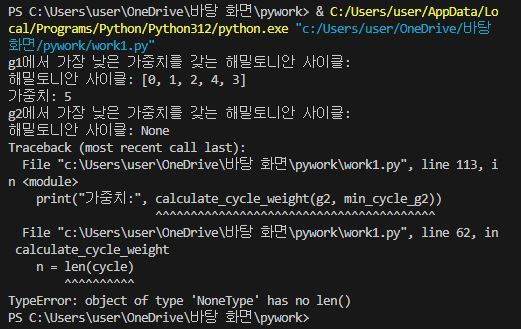

## 8. 복잡도 분석
- is_safe 함수: 각 호출마다 현재 경로에 대해 모든 정점을 확인해야 하므로 시간 복잡도는 O(n)
- hamiltonian_recur 함수: 재귀 호출이 이루어지며, 모든 정점을 방문해야함.
각 재귀 호출마다 is_safe 함수가 호출되므로 O(n)
재귀 호출은 최악의 경우에는 n-1개의 정점을 방문해야 하므로 시간 복잡도는 O(n!)
- hamiltonian_cycle 함수: hamiltonian_recur 함수를 호출하므로 시간 복잡도는 O(n!)
- find_all_hamiltonian_cycles 함수: 모든 해밀턴 사이클을 찾기 위해 백트래킹이 이루어지며, 각 백트래킹 단계에서는 모든 정점을 방문해야 함. 따라서 시간 복잡도는 O(n!)
- calculate_cycle_weight 함수: 해밀턴 사이클을 구성하는 모든 간선의 가중치를 더해야 하므로 시간 복잡도는 O(n)

따라서 전체 알고리즘의 시간 복잡도는 O(n!)